In [1]:
import numpy as np
from scipy import constants as const
from scipy.special import zeta
from mpmath import polylog
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 20

**Problem Statement:**

Consider a gas of non-interacting bosons confined in a three-dimensional harmonic trap with trap frequency $\omega_0$.                                          
The system undergoes Bose–Einstein condensation at a critical temperature $T_c$.                                                                                
Using the Bose distribution, study the thermodynamic properties of the gas as functions of the reduced temperature $T/T_c$.

Specifically, compute and plot:

1. **Fugacity $z = e^{\beta \mu}$** as a function of $T/T_c$.
2. **Scaled internal energy** $U/(N k_B T_c)$ as a function of $T/T_c$.
3. **Scaled heat capacity** $C_N/(N k_B)$ as a function of $T/T_c$.

## **Bose Gas in Grand Canonical Ensemble**

For a gas of non-interacting bosons of mass $m$ at temperature $T$ and chemical potential $\mu$:


### **1  Fugacity**

$$
z = e^{\beta \mu}, \quad \beta = \frac{1}{k_B T}, \quad 0 \le z \le 1
$$


### **2  Pressure**

$$
\frac{P}{k_B T} = - \frac{2 \pi (2 m)^{3/2}}{h^3} \int_0^\infty \varepsilon^{1/2} \ln\big(1 - z e^{-\beta \varepsilon}\big) \, d\varepsilon \; - \frac{1}{V} \ln(1-z)
$$

* First term: contribution from excited states.
* Second term: contribution from the ground state.


### **3  Number density**

$$
\frac{N}{V} = \frac{2 \pi (2 m)^{3/2}}{h^3} \int_0^\infty \frac{\varepsilon^{1/2} \, d\varepsilon}{z^{-1} e^{\beta \varepsilon} - 1} + \frac{1}{V} \frac{z}{1-z}
$$

* First term: excited states.

* Second term: ground state (zero energy).

* **Thermodynamic limit:** $V \to \infty$, second term negligible.


### **4 Bose Functions**

$$
g_\nu(z) = \sum_{l=1}^{\infty} \frac{z^l}{l^\nu}, \quad 
\int_0^\infty \frac{\varepsilon^{s-1} d\varepsilon}{z^{-1} e^{\beta \varepsilon} - 1} = \Gamma(s) (k_B T)^s g_s(z)
$$


## **Internal Energy and Particle Number in Harmonic Trap**

### **1 Internal Energy**

$$
U(\mu, T) = \int_0^\infty \frac{\varepsilon^3}{2 (\hbar \omega_0)^3} \frac{d\varepsilon}{e^{\beta (\varepsilon - \mu)} - 1} 
= \frac{3 (k_B T)^4}{(\hbar \omega_0)^3} g_4(z)
$$


### **2️ Total Particle Number**

$$
N = \int_0^\infty \frac{\varepsilon^2}{2 (\hbar \omega_0)^3} \frac{d\varepsilon}{e^{\beta (\varepsilon - \mu)} - 1} 
= \frac{(k_B T)^3}{(\hbar \omega_0)^3} g_3(z)
$$

At the **critical temperature** $T_c$:

$$
N = \frac{(k_B T_c)^3}{(\hbar \omega_0)^3} \zeta(3), \quad z \to 1
$$


### **3️ Scaled Internal Energy**

$$
\frac{U}{N k_B T_c} =
\begin{cases} 
3 \frac{\zeta(4)}{\zeta(3)} \left(\frac{T}{T_c}\right)^4, & T \le T_c \\[2mm]
3 \frac{g_4(z)}{\zeta(3)} \left(\frac{T}{T_c}\right)^4, & T > T_c
\end{cases}
$$

* Below $T_c$: fugacity $z = 1$.
* Above $T_c$: fugacity $z < 1$, determined from $N = (k_B T)^3/(\hbar \omega_0)^3 g_3(z)$.


## **Heat Capacity at Constant Particle Number**

### **1️ General Definition**

$$
C_N(T) = \left(\frac{\partial U}{\partial T}\right)_N
= \left(\frac{\partial U}{\partial T}\right)_\mu + \left(\frac{\partial U}{\partial \mu}\right)_T \left(\frac{\partial \mu}{\partial T}\right)_N
$$

$$
C_N(T) = \left(\frac{\partial U}{\partial T}\right)_\mu - \left(\frac{\partial U}{\partial \mu}\right)_T \frac{\left(\frac{\partial N}{\partial T}\right)_\mu}{\left(\frac{\partial N}{\partial \mu}\right)_T} \qquad\qquad\qquad \left[ \because \ \left(\frac{\partial \mu}{\partial T}\right)_N = - \frac{\left(\frac{\partial N}{\partial T}\right)_\mu}{\left(\frac{\partial N}{\partial \mu}\right)_T} \ \right]
$$


### **2 Express in Terms of Bose Functions**

$$
U(T, \mu) = 3 (k_B T)^4/(\hbar \omega_0)^3 \, g_4(z), \quad
N(T, \mu) = (k_B T)^3/(\hbar \omega_0)^3 \, g_3(z)
$$

$$
\frac{\partial g_\nu(z)}{\partial z} = \frac{g_{\nu-1}(z)}{z}
$$


### **3️ Scaled Heat Capacity**

$$
\frac{C_N}{N k_B} =
\begin{cases} 
12 \frac{\zeta(4)}{\zeta(3)} \left(\frac{T}{T_c}\right)^3, & T \le T_c \\[1mm]
\frac{1}{\zeta(3)} \left(\frac{T}{T_c}\right)^3 \left[ 12 g_4(z) - 9 \frac{g_3^2(z)}{g_2(z)} \right], & T > T_c
\end{cases}
$$

* Below $T_c$: slope grows as $T^3$.
* Above $T_c$: fugacity $z < 1$, numerical evaluation needed.
* Shows **jump in slope at $T_c$** characteristic of BEC.


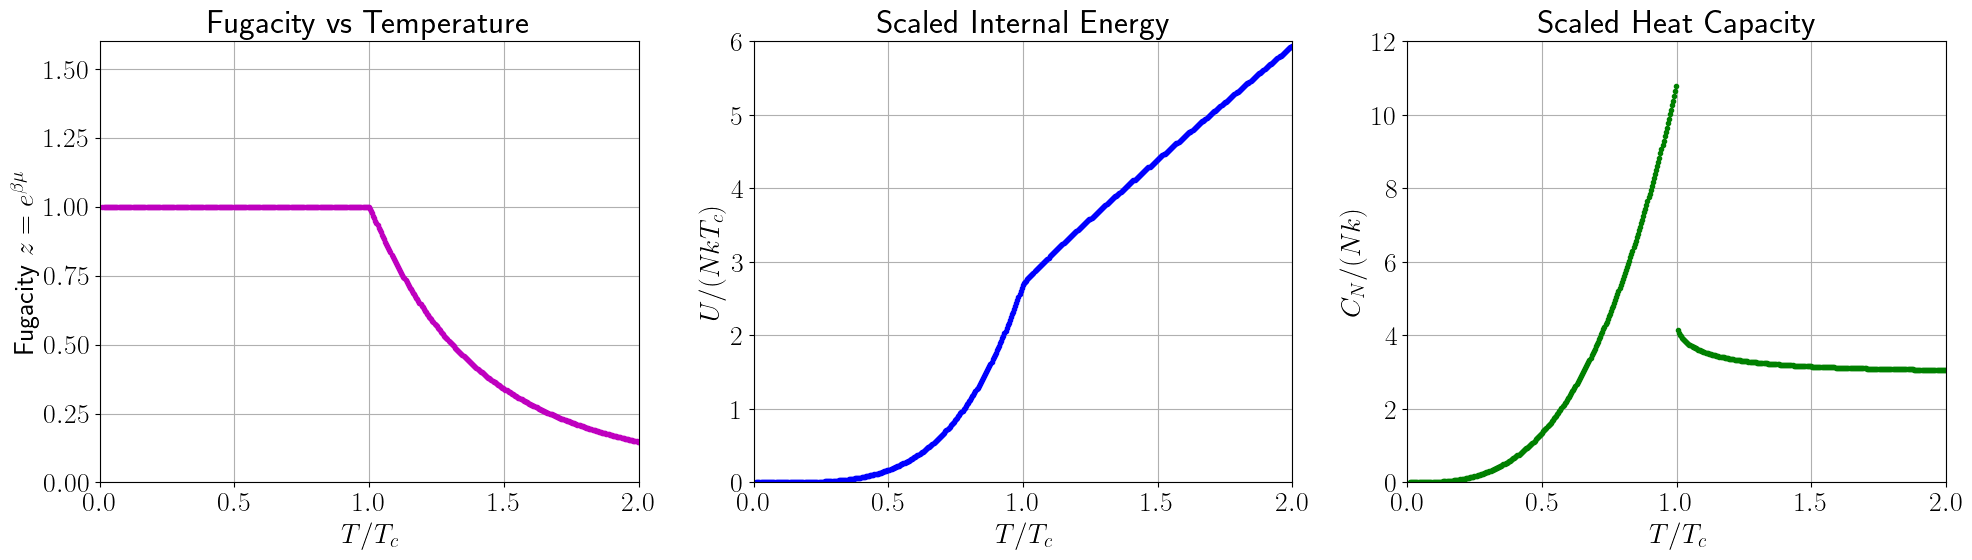

In [2]:
def g_n(n, z, L_max=200):
    l = np.arange(1, L_max+1)
    return np.sum(z**l / l**n)

T_Tc     = np.linspace(0.01, 2.0, 500)  # Temperature range T/Tc
U_scaled = np.zeros_like(T_Tc)
C_scaled = np.zeros_like(T_Tc)
z_vals   = np.zeros_like(T_Tc)

for i, t in enumerate(T_Tc):
    if t <= 1.0:               # Below Tc: fugacity z -> 1
        z_vals[i] = 1.0
        U_scaled[i] = 3 * (t**4) * zeta(4)/zeta(3)
        C_scaled[i] = 12 * zeta(4)/zeta(3) * t**3
    else:                      # Above Tc: solve for fugacity z numerically
        target = zeta(3)/t**3
        z = 0.9                  # initial guess
        for _ in range(100):
            g3 = g_n(3, z)
            g2 = g_n(2, z)
            f  = g3 - target
            df = g2 / z
            z  = z - f/df
            z  = min(max(z, 0.0), 0.999999)
        z_vals[i] = z
        g4 = g_n(4, z)
        U_scaled[i] = 3 * (t**4) * g4 / zeta(3)
        C_scaled[i] = (1/ zeta(3)) * t**3 * (12*g4 - 9*g3**2 / g2)

plt.figure(figsize=(20, 6))

# Fugacity
plt.subplot(1,3,1)
plt.plot(T_Tc, z_vals, 'm.', lw=2)
plt.xlabel(r'$T/T_c$')
plt.ylabel(r'Fugacity $z = e^{\beta\mu}$')
plt.title("Fugacity vs Temperature")
plt.grid(True)
plt.ylim([0, 1.6])
plt.xlim([0, 2])

# Internal Energy
plt.subplot(1,3,2)
plt.plot(T_Tc, U_scaled, 'b.', lw=2)
plt.xlabel(r'$T/T_c$')
plt.ylabel(r'$U/(NkT_c)$')
plt.title("Scaled Internal Energy")
plt.grid(True)
plt.ylim([0, 6])
plt.xlim([0, 2])

# Heat Capacity
plt.subplot(1,3,3)
plt.plot(T_Tc, C_scaled, 'g.', lw=2)
plt.xlabel(r'$T/T_c$')
plt.ylabel(r'$C_N/(Nk)$')
plt.title("Scaled Heat Capacity")
plt.grid(True)
plt.ylim([0, 12])
plt.xlim([0, 2])
plt.tight_layout()
plt.show()

From your provided formulas :

$$
N_e \;=\; V\,\frac{(2\pi m k T)^{3/2}}{h^3}\,\zeta\!\big(\tfrac{3}{2}\big)
\tag{1}
$$

and

$$
N_0 \;=\; N - V\,\frac{(2\pi m k T)^{3/2}}{h^3}\,\zeta\!\big(\tfrac{3}{2}\big).
\tag{2}
$$

Define the critical temperature $T_c$ by the condition that at $T=T_c$ the excited states can accommodate exactly the total particle number $N$, i.e.

$$
N \;=\; V\,\frac{(2\pi m k T_c)^{3/2}}{h^3}\,\zeta\!\big(\tfrac{3}{2}\big).
\tag{3}
$$

(Equation (3) is the standard definition of $T_c$ and follows from setting $N_e(T_c)=N$.)

Divide equation (1) by equation (3):

$$
\frac{N_e}{N}
= \frac{V\,\dfrac{(2\pi m k T)^{3/2}}{h^3}\,\zeta(3/2)}
{V\,\dfrac{(2\pi m k T_c)^{3/2}}{h^3}\,\zeta(3/2)}
= \frac{(2\pi m k T)^{3/2}}{(2\pi m k T_c)^{3/2}}.
$$

Cancel the common prefactors to get

$$
\boxed{\displaystyle \frac{N_e}{N}=\left(\frac{T}{T_c}\right)^{3/2}, \qquad (T\le T_c).}
$$

(For $T>T_c$ the right-hand side exceeds 1 if formally used; physically $N_e$ cannot exceed $N$ so for $T\ge T_c$ all particles are in excited states and $N_e/N=1$.)


Start from $N_0 = N - N_e$. Divide by $N$ and substitute the result just obtained:

$$
\frac{N_0}{N} = 1 - \frac{N_e}{N} = 1 - \left(\frac{T}{T_c}\right)^{3/2}.
$$

So

$$
\boxed{\displaystyle \frac{N_0}{N}=1-\left(\frac{T}{T_c}\right)^{3/2}, \qquad (T\le T_c).}
$$

(Again, for $T\ge T_c$ this becomes $N_0/N=0$.)


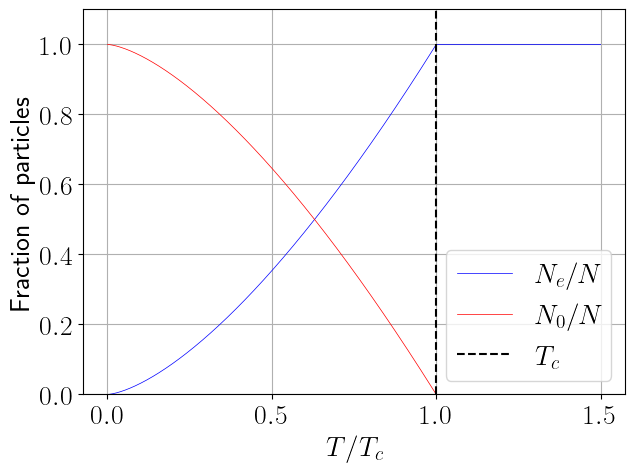

In [3]:
T_Tc    = np.linspace(0, 1.5, 500)  # T/Tc
Ne_frac = np.ones_like(T_Tc)
N0_frac = np.zeros_like(T_Tc)

for i, t in enumerate(T_Tc):
    if t <= 1.0:
        Ne_frac[i] = t**(3/2)
        N0_frac[i] = 1 - t**(3/2)
    else:
        Ne_frac[i] = 1.0
        N0_frac[i] = 0.0

plt.figure(figsize=(7,5))
plt.plot(T_Tc, Ne_frac, 'b-', lw=0.51, label=r'$N_e/N$')
plt.plot(T_Tc, N0_frac, 'r-', lw=0.51, label=r'$N_0/N$')
plt.axvline(1.0, color='k', ls='--', label=r'$T_c$')
plt.xlabel(r'$T/T_c$')
plt.ylabel('Fraction of particles')
#plt.title('Excited and Condensate Fractions vs Reduced Temperature')
plt.grid(True)
plt.legend()
plt.ylim([0, 1.1])
plt.show()

For an ideal Bose gas in 3D:

$$
g_{3/2}(z) = \sum_{l=1}^{\infty} \frac{z^l}{l^{3/2}} = \frac{\lambda^3}{v} < \zeta(3/2) \approx 2.612
$$

* Here, $v = V/N$ is the **volume per particle**, and $\lambda = \sqrt{2 \pi \hbar^2 / (m k_B T)}$ is the thermal wavelength.
* If $\lambda^3/v < \zeta(3/2)$, all particles can be accommodated in the **excited states**, and $z < 1$.
* If $\lambda^3/v \ge \zeta(3/2)$, the excited states are **saturated**, and the extra particles go into the **ground state**, i.e., Bose–Einstein condensation occurs.

So the **allowed range for fugacity** is:

$$
0 \le z < 1, \quad \text{with } g_{3/2}(z) = \frac{\lambda^3}{v} \le \zeta(3/2) \approx 2.612
$$

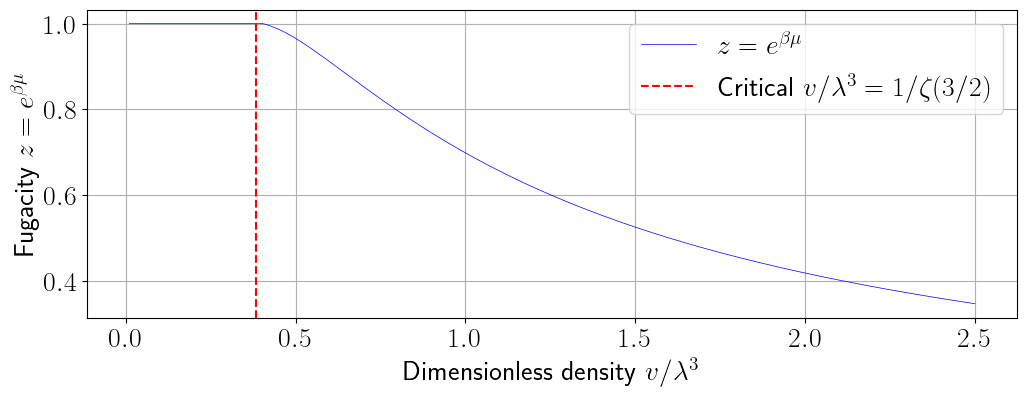

In [4]:
def g_n(n, z, L_max=200):
    l = np.arange(1, L_max+1)
    return np.sum(z**l / l**n)

v_lambda3 = np.linspace(0.01, 2.5, 400)
z_vals = np.zeros_like(v_lambda3)

for i, v_l in enumerate(v_lambda3):
    target = 1 / v_l  # g_{3/2}(z) = 1/(v/lambda^3)
    z = 0.9  # initial guess
    for _ in range(200):
        g32 = g_n(1.5, z)
        dg32 = g_n(0.5, z) / z
        f = g32 - target
        df = dg32
        z = z - f/df
        z = min(max(z, 0.0), 0.999999)
    z_vals[i] = z  
    
plt.figure(figsize=(12, 4))
plt.plot(v_lambda3, z_vals, 'b-', lw=0.51, label=r'$z = e^{\beta \mu}$')
plt.axvline(1/zeta(1.5), color='r', ls='--', label=r'Critical $v/\lambda^3 = 1/\zeta(3/2)$')
#plt.axhline(1, color='g', ls='--')
plt.xlabel(r'Dimensionless density $v/\lambda^3$')
plt.ylabel(r'Fugacity $z = e^{\beta \mu}$')
#plt.title('Fugacity $z = e^{\beta \mu}$ vs Dimensionless Density $v/\lambda^3$')
plt.legend()
plt.grid(True)
plt.show()

  

* **Fugacity**:

$$
z = e^{\beta \mu}, \quad 0 \le z \le 1
$$

* **Bose functions**:

$$
g_\nu(z) = \sum_{l=1}^{\infty} \frac{z^l}{l^\nu}, \quad z<1
$$

* **Critical temperature** $T_c$ (harmonic trap or 3D box):

$$
N = \frac{(k_B T_c)^3}{(\hbar \omega_0)^3} \zeta(3) \quad \text{or} \quad N/V = \frac{1}{\lambda_c^3} \zeta(3/2)
$$

 
## **Internal Energy**

$$
U(\mu,T) = \frac{3 (k_B T)^4}{(\hbar \omega_0)^3} g_4(z)
$$

**Scaled internal energy per particle**:

$$
\frac{U}{N k_B T_c} =
\begin{cases} 
3 \left(\frac{T}{T_c}\right)^4 \frac{\zeta(4)}{\zeta(3)}, & T \le T_c \\
3 \left(\frac{T}{T_c}\right)^4 \frac{g_4(z)}{\zeta(3)}, & T > T_c
\end{cases}
$$


## **Heat Capacity**

$$
C_N(T) = \left(\frac{\partial U}{\partial T}\right)_N
$$

**Scaled heat capacity**:

$$
\frac{C_N}{N k_B} =
\begin{cases} 
12 \frac{\zeta(4)}{\zeta(3)} \left(\frac{T}{T_c}\right)^3, & T \le T_c \\
\frac{1}{\zeta(3)} \left(\frac{T}{T_c}\right)^3 \left[ 12 g_4(z) - 9 \frac{g_3^2(z)}{g_2(z)} \right], & T > T_c
\end{cases}
$$

**Below $T_c$:**

$$
\frac{C_V(T_c)}{Nk_B} = 1.925
$$

## **Fugacity**

* Below $T_c$: $z = 1$
* Above $T_c$: Solve $g_3(z) = \zeta(3)/ (T/T_c)^3$


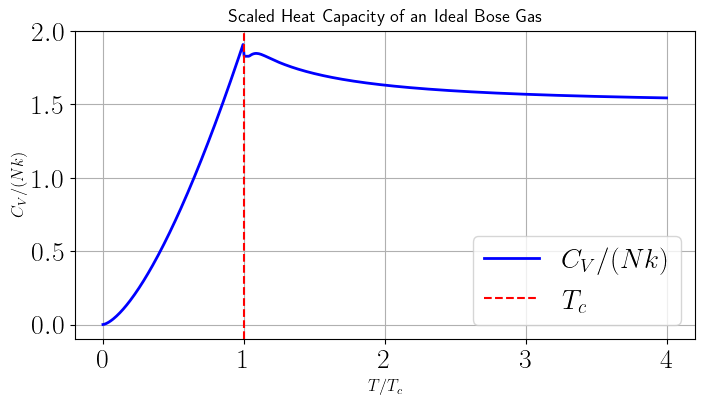

In [5]:
 def g_n(n, z, L_max=200):
    l = np.arange(1, L_max+1)
    return np.sum(z**l / l**n)

T_Tc      = np.linspace(0.0, 4.0, 500)  # T/Tc
Cv_scaled = np.zeros_like(T_Tc)
z_vals    = np.zeros_like(T_Tc)

for i, t in enumerate(T_Tc):
    if t <= 1.0:
        # Below Tc
        z_vals[i] = 1.0
        Cv_scaled[i] = 15/4 * zeta(5/2) / zeta(3/2) * t**(3/2)
    else:
        # Above Tc:  
        target = zeta(3/2) / t**(3/2)
        z = 0.9
        for _ in range(200):
            f = g_n(3/2, z) - target
            df = g_n(1/2, z) / z
            z  = z - f/df
            z  = min(max(z, 1e-12), 1)
        z_vals[i] = z
        Cv_scaled[i] = 15/4 * g_n(5/2, z)/g_n(3/2, z) - 9/4 * g_n(3/2, z)/g_n(1/2, z)
 
plt.figure(figsize=(8,4))
plt.plot(T_Tc, Cv_scaled, 'b-', lw=2, label=r'$C_V/(Nk)$')
plt.axvline(1, color='r', ls='--', label=r'$T_c$')
plt.xlabel(r'$T/T_c$', fontsize=12)
plt.ylabel(r'$C_V/(Nk)$', fontsize=12)
plt.title("Scaled Heat Capacity of an Ideal Bose Gas", fontsize=13)
plt.legend()
plt.grid(True)
plt.show()

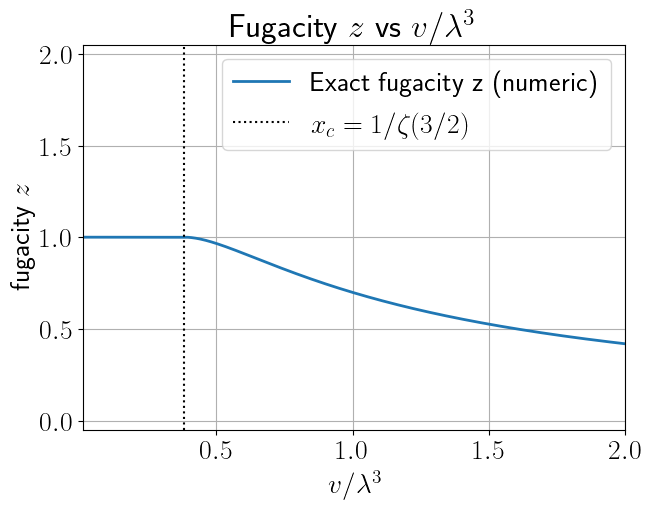

In [6]:
x_vals = np.linspace(0.01, 2.0, 600)
z_vals = np.zeros_like(x_vals)

def find_z_bisect_for_target(target, tol=1e-12, maxiter=100):
    a = 0.0
    b = 1.0
    fa = -target
    fb = float(polylog(1.5, 1.0)) - target
    if fb < 0:
        return None
    for _ in range(maxiter):
        m = 0.5*(a+b)
        fm = float(polylog(1.5, m)) - target
        if abs(fm) < tol:
            return m
        if fa*fm < 0:
            b = m
            fb = fm
        else:
            a = m
            fa = fm
    return 0.5*(a+b)

for i, x in enumerate(x_vals):
    target = 1.0 / x
    if x <= 1.0 / float(zeta(3/2)):
        z_vals[i] = 1.0
    else:
        z_root = find_z_bisect_for_target(target)
        if z_root is None:
            z_vals[i] = 1.0
        else:
            z_vals[i] = z_root

x_c = 1.0 / float(zeta(3/2))

plt.figure(figsize=(7,5))
plt.plot(x_vals, z_vals, label='Exact fugacity z (numeric)', lw=2)
plt.axvline(x_c, color='k', ls=':', label=r'$x_c = 1/\zeta(3/2)$')
plt.xlabel(r'$v/\lambda^3$')
plt.ylabel(r'fugacity $z$')
plt.title('Fugacity $z$ vs $v/\\lambda^3$')
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 2.05)
plt.xlim(x_vals.min(), x_vals.max())
plt.show()